In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [2]:
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Machine learning\\NEW DATASET\\Analytics Vidhya\\Upvote Count'


Problem Statement
    

An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform.
This identification will bring more insight into increasing the user engagement.
Given the tag of the question, number of views received, number of answers,
username and reputation of the question author, the problem requires you to 
predict the upvote count that the question will receive.

Data Dictionary

Variable 	Definition
ID 	Question ID
Tag 	Anonymised tags representing question category
Reputation 	Reputation score of question author
Answers 	Number of times question has been answered
Username 	Anonymised user id of question author
Views 	Number of times question has been viewed
Upvotes 	(Target) Number of upvotes for the question

 
Evaluation Metric

The evaluation metric for this competition is RMSE (root mean squared error)
Public and Private Split

Note that the test data is further randomly divided into Public (30%) and Private (70%) data. Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.
How to make a Submission?




In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train


,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [4]:
df_test

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
...,...,...,...,...,...,...
141443,47187,j,4681.0,4.0,152060,2469.0
141444,329126,j,7782.0,3.0,89235,18998.0
141445,282334,p,435.0,5.0,119788,57048.0
141446,386629,o,176.0,3.0,86824,10193.0


In [5]:
330045+141448


471493

In [6]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
471488,47187,j,4681.0,4.0,152060,2469.0,NaN
471489,329126,j,7782.0,3.0,89235,18998.0,NaN
471490,282334,p,435.0,5.0,119788,57048.0,NaN
471491,386629,o,176.0,3.0,86824,10193.0,NaN


In [8]:
df.Answers.unique()

array([ 2., 12.,  4.,  3.,  1.,  7.,  8.,  0.,  5., 13.,  9., 22., 10.,
        6., 11., 41., 16., 17., 25., 19., 21., 15., 20., 14., 18., 30.,
       34., 37., 33., 24., 26., 28., 29., 31., 27., 23., 32., 39., 49.,
       35., 38., 36., 50., 43., 47., 61., 51., 57., 40., 54., 46., 62.,
       48., 60., 53., 59., 42., 45., 76., 66., 44., 58., 55., 68., 73.])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          471493 non-null  int64  
 1   Tag         471493 non-null  object 
 2   Reputation  471493 non-null  float64
 3   Answers     471493 non-null  float64
 4   Username    471493 non-null  int64  
 5   Views       471493 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 25.2+ MB


#### Distribution of Numerical Features

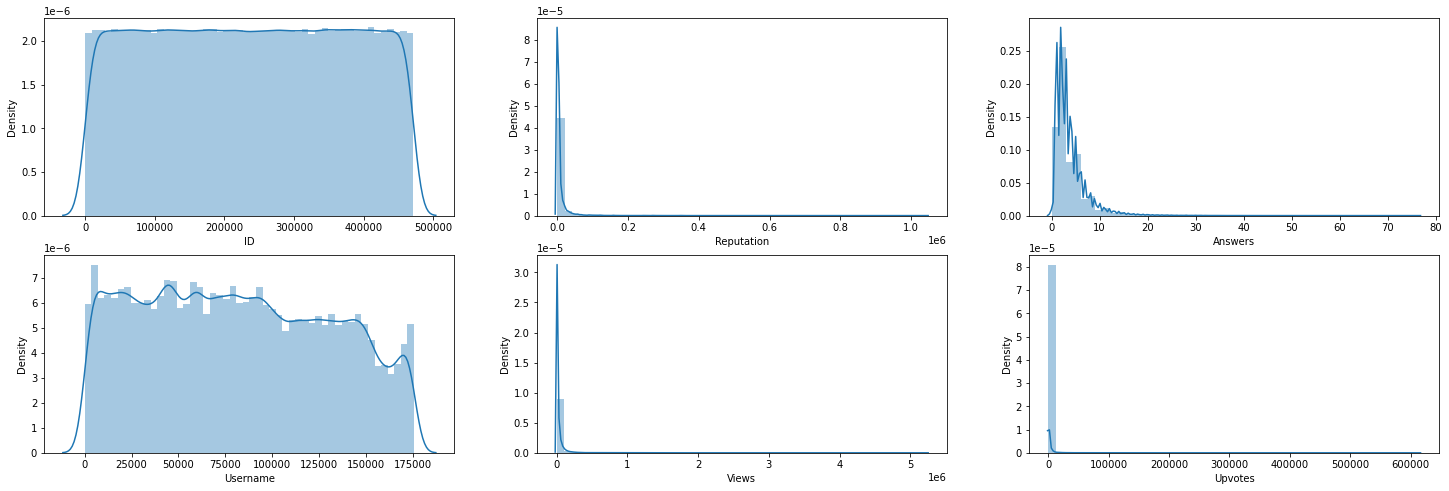

In [10]:

# ploting the distplot
df_train_plot=df_train.drop('Tag',axis=1)

fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(25,8))


for  variable, subplot in zip(df_train_plot, ax.flatten()):
    
    sns.distplot(df_train_plot[variable],kde=True,ax = subplot)


In [10]:
df['Answers_exp']=np.exp(df.Answers)
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answers_exp
0,52664,a,3942.0,2.0,155623,7855.0,42.0,7.389056
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,162754.791419
2,468453,c,1358.0,4.0,56177,8067.0,60.0,54.598150
3,96996,a,264.0,3.0,168793,27064.0,9.0,20.085537
4,131465,c,4271.0,4.0,112223,13986.0,83.0,54.598150
...,...,...,...,...,...,...,...,...
471488,47187,j,4681.0,4.0,152060,2469.0,NaN,54.598150
471489,329126,j,7782.0,3.0,89235,18998.0,NaN,20.085537
471490,282334,p,435.0,5.0,119788,57048.0,NaN,148.413159
471491,386629,o,176.0,3.0,86824,10193.0,NaN,20.085537


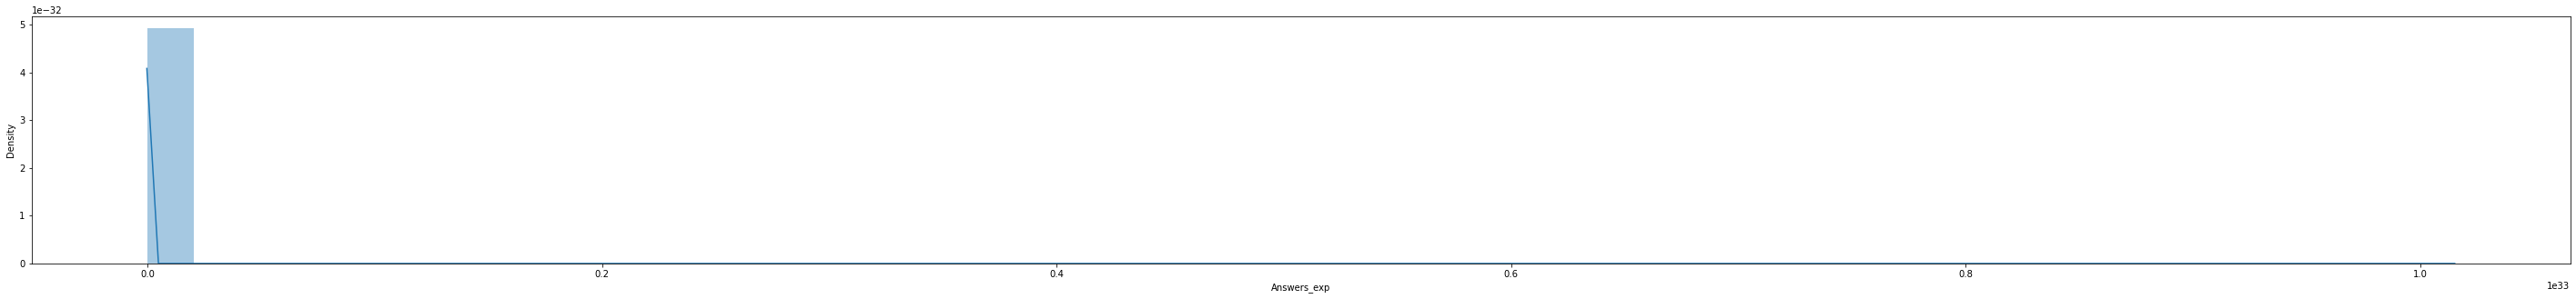

In [62]:
plt.figure(figsize=(50,5))
sns.distplot(df['Answers_exp'],kde=True)

plt.show()

##  2.EDA andn Feature Engineering

#### 2.1 Checking outliers and any kind of Iregularities in data

In [11]:
df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Answers_exp
0,52664,a,3942.0,2.0,155623,7855.0,42.0,7.389056
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,162754.791419
2,468453,c,1358.0,4.0,56177,8067.0,60.0,54.598150
3,96996,a,264.0,3.0,168793,27064.0,9.0,20.085537
4,131465,c,4271.0,4.0,112223,13986.0,83.0,54.598150
...,...,...,...,...,...,...,...,...
471488,47187,j,4681.0,4.0,152060,2469.0,NaN,54.598150
471489,329126,j,7782.0,3.0,89235,18998.0,NaN,20.085537
471490,282334,p,435.0,5.0,119788,57048.0,NaN,148.413159
471491,386629,o,176.0,3.0,86824,10193.0,NaN,20.085537


In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,330045.0,235748.682789,136039.418471,1.0,117909.0,235699.0,353620.0,471493.0
Reputation,330045.0,7773.146798,27061.412587,0.0,282.0,1236.0,5118.0,1042428.0
Answers,330045.0,3.917672,3.579515,0.0,2.0,3.0,5.0,76.0
Username,330045.0,81442.888803,49215.100730,0.0,39808.0,79010.0,122559.0,175738.0
Views,330045.0,29645.071342,80956.456478,9.0,2594.0,8954.0,26870.0,5231058.0
Upvotes,330045.0,337.505358,3592.441135,0.0,8.0,28.0,107.0,615278.0


**1.As we see in features like Views,Reputation ,Upvotes there are many outliers so instead of treating we keep it and build the model for now and check its affect

2.As we see 

<AxesSubplot:>

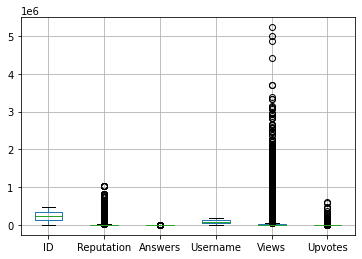

In [13]:
df_train.boxplot()

##### 2.2 Checking Nulls

In [14]:
df.isnull().sum()

ID                  0
Tag                 0
Reputation          0
Answers             0
Username            0
Views               0
Upvotes        141448
Answers_exp         0
dtype: int64

#### 2.3 Checking Relation and Correlation between Variables

In [15]:
#Checking Relation between variables
#sns.pairplot(df_train)

<AxesSubplot:>

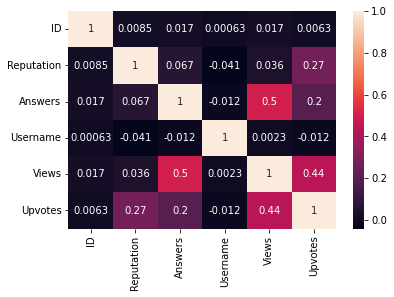

In [16]:
#Checking Correlation Between Variables
import seaborn as sns
sns.heatmap(df_train.corr(),annot =True)

#### 2.4 Feature Engineering and Feature Selection

In [17]:
dict={}
for i in df_train.columns:
    dict[i]=df_train[i].unique()
print(dict)   

{'ID': array([ 52664, 327662, 468453, ..., 210756,  56089, 300553], dtype=int64), 'Tag': array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object), 'Reputation': array([ 3942., 26046.,  1358., ..., 39952., 14347., 65763.]), 'Answers': array([ 2., 12.,  4.,  3.,  1.,  7.,  8.,  0.,  5., 13.,  9., 22., 10.,
        6., 11., 41., 16., 17., 25., 19., 21., 15., 20., 14., 18., 30.,
       34., 37., 33., 24., 26., 28., 29., 31., 27., 23., 32., 39., 49.,
       35., 38., 36., 50., 43., 47., 61., 51., 57., 40., 54., 46., 62.,
       48., 60., 53., 59., 42., 45., 76., 66., 44., 58., 55.]), 'Username': array([155623,  21781,  56177, ...,   8874,  84919,  80245], dtype=int64), 'Views': array([ 7855., 55801.,  8067., ..., 85644., 52493., 23319.]), 'Upvotes': array([4.2000e+01, 1.1750e+03, 6.0000e+01, ..., 3.3900e+03, 3.9280e+03,
       4.5611e+04])}


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           471493 non-null  int64  
 1   Tag          471493 non-null  object 
 2   Reputation   471493 non-null  float64
 3   Answers      471493 non-null  float64
 4   Username     471493 non-null  int64  
 5   Views        471493 non-null  float64
 6   Upvotes      330045 non-null  float64
 7   Answers_exp  471493 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 28.8+ MB


##### ID Column

In [19]:
# we drop the ID columns as it is useless in this dataset and have many unique values
#df.drop('ID',axis=1,inplace=True)

##### Tag Column

In [20]:
df.Tag.unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [21]:
# Label Encode top numerical values for model feed
#Numerical Encoding of Unique values of Tag column
count=0
for i in df['Tag'].unique():
    df['Tag'].replace(i,count,inplace=True)
    count+=1
df['Tag'].unique()    


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
df.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes',
       'Answers_exp'],
      dtype='object')

## Feature Engineeering

### Answers

In [23]:

df.Answers.unique()

array([ 2., 12.,  4.,  3.,  1.,  7.,  8.,  0.,  5., 13.,  9., 22., 10.,
        6., 11., 41., 16., 17., 25., 19., 21., 15., 20., 14., 18., 30.,
       34., 37., 33., 24., 26., 28., 29., 31., 27., 23., 32., 39., 49.,
       35., 38., 36., 50., 43., 47., 61., 51., 57., 40., 54., 46., 62.,
       48., 60., 53., 59., 42., 45., 76., 66., 44., 58., 55., 68., 73.])

In [24]:
df.Answers.value_counts()

2.0     102354
1.0      92973
3.0      80422
4.0      57882
5.0      39826
         ...  
62.0         2
76.0         1
55.0         1
68.0         1
73.0         1
Name: Answers, Length: 65, dtype: int64

In [25]:
## Answers have continious data so we can binning the data
df['Answers']=pd.cut(df.Answers,bins=[-1,0,17,40,76]
                        ,labels=['Unanswered','Least Answered','Average Answered','Most Answered'])

In [26]:
df['Answers'].value_counts()

Least Answered      463327
Average Answered      5068
Unanswered            2958
Most Answered          140
Name: Answers, dtype: int64

<AxesSubplot:xlabel='Answers', ylabel='count'>

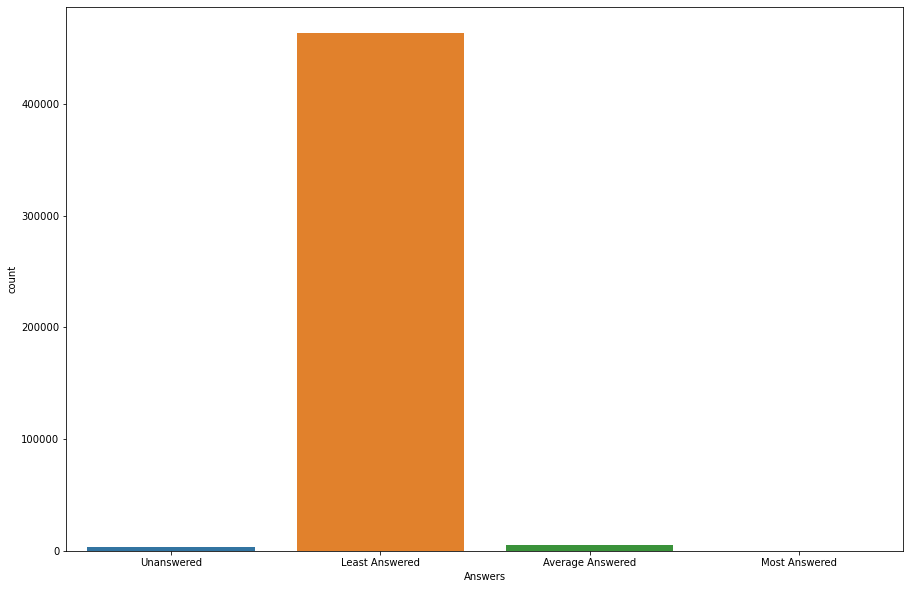

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(df.Answers)

### For Reputation

In [30]:
df.Reputation.unique()

array([ 3942., 26046.,  1358., ..., 29698.,  9248.,  5968.])

pd.options.display.max_columns=100
pd.options.display.max_rows=None

In [31]:
df.Reputation.value_counts().sort_values(ascending =False)

0.0        9453
1.0        1529
16.0       1476
11.0       1429
6.0        1386
           ... 
41623.0       1
32576.0       1
15685.0       1
11724.0       1
5968.0        1
Name: Reputation, Length: 17414, dtype: int64

In [32]:
## Views  have continious data so we can binning the data
df['Views']=pd.cut(df.Views,bins=[8,30000,90000,100000,1000000,5231058]
                        ,labels=['Least Viewed','Less Views','Average Viewed','More Viewed','Most Viewed'])

In [33]:
df.Views.value_counts()

Least Viewed      363694
Less Views         74102
More Viewed        28884
Average Viewed      4339
Most Viewed          474
Name: Views, dtype: int64

<AxesSubplot:xlabel='Views', ylabel='count'>

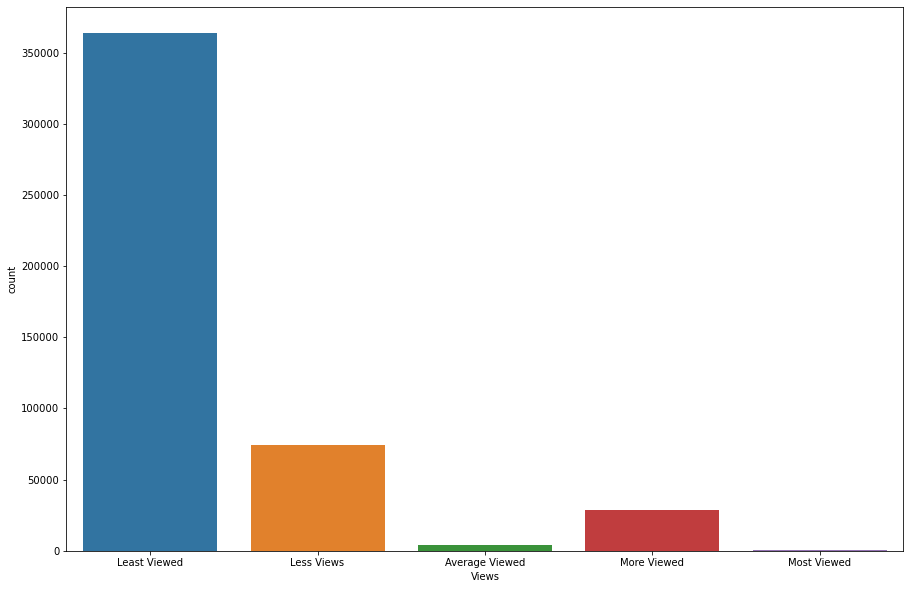

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(df.Views)

#### Username

In [35]:
df.Username.unique()

array([155623,  21781,  56177, ...,  31988,  23595, 119788], dtype=int64)

In [36]:
df.Username.value_counts().sort_values(ascending =False)

4118      1133
17878      836
45704      688
23223      612
62142      608
          ... 
119497       1
20007        1
122150       1
150814       1
119788       1
Name: Username, Length: 175739, dtype: int64

count=0
for i in df['Product_ID'].unique():
    df['Product_ID'].replace(i,count,inplace=True)
    count+=1
df['Product_ID'] 

In [38]:
for i in df.Username.unique():
    df['Users']=pd.cut(df.Username.value_counts(),bins=[0,10,50,200,500,1200]
                        ,labels=['Least Active User','Less Active User','Average Active User','Regularly Active User','Most Active User'])

df['Users']

0         Least Active User
1         Least Active User
2         Least Active User
3         Least Active User
4         Least Active User
                ...        
471488                  NaN
471489                  NaN
471490                  NaN
471491                  NaN
471492                  NaN
Name: Users, Length: 471493, dtype: category
Categories (5, object): ['Least Active User' < 'Less Active User' < 'Average Active User' < 'Regularly Active User' < 'Most Active User']

In [ ]:
df['Users'].value_counts()

df['Username']=pd.cut(df.Usernamevalue_counts,bins=[-1,10000,30000,50000,90000,175740]
                        ,labels=['Least Active User','Less Active User','Average Active User','Regularly Active User','Most Active User'])

### FINAL Dataset

In [36]:
#treated nulls and feature engineered train data
df_train_final=df[~df['Upvotes'].isnull()]
df_train_final.shape

(330045, 7)

In [50]:
df_train_final=df_train_final.drop('ID',axis=1)
df_train_final

,Tag,Reputation,Answers,Username,Views,Upvotes
0,0,3942.0,2.0,155623,7855.0,42.0
1,0,26046.0,12.0,21781,55801.0,1175.0
2,1,1358.0,4.0,56177,8067.0,60.0
3,0,264.0,3.0,168793,27064.0,9.0
4,1,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...
330040,1,36.0,2.0,84919,1063.0,0.0
330041,1,1649.0,2.0,76730,23319.0,73.0
330042,1,6178.0,2.0,91701,2453.0,15.0
330043,3,89.0,2.0,80245,2107.0,3.0


In [39]:
df_train.Username.value_counts()

4118      797
17878     608
45704     483
23223     413
62142     408
         ... 
122593      1
110208      1
137797      1
17286       1
80245       1
Name: Username, Length: 141802, dtype: int64

In [40]:
#treated nulls and feature engineered train test data
df_test_final=df[df['Upvotes'].isnull()]
df_test_final=df_test_final.drop('Upvotes',axis=1)
df_test_final.shape

(141448, 6)

In [41]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,330045.0,235748.682789,136039.418471,1.0,117909.0,235699.0,353620.0,471493.0
Reputation,330045.0,7773.146798,27061.412587,0.0,282.0,1236.0,5118.0,1042428.0
Answers,330045.0,3.917672,3.579515,0.0,2.0,3.0,5.0,76.0
Username,330045.0,81442.888803,49215.100730,0.0,39808.0,79010.0,122559.0,175738.0
Views,330045.0,29645.071342,80956.456478,9.0,2594.0,8954.0,26870.0,5231058.0
Upvotes,330045.0,337.505358,3592.441135,0.0,8.0,28.0,107.0,615278.0


### Train Dataset and Test Dataset

#### Standardizing the Data

In [42]:
df_train_final.shape,df_test_final.shape

((330045, 7), (141448, 6))

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df_train_sc=sc.fit_transform(df_train_final)
df_train_sc=pd.DataFrame(df_train_sc)

df_test_sc=sc.fit_transform(df_test_final)

In [52]:
df_train_sc

,0,1,2,3,4,5
0,-1.375177,-0.141573,-0.535736,1.507266,-0.269158,-0.082258
1,-1.375177,0.675238,2.257943,-1.212270,0.323087,0.233127
2,-0.981018,-0.237059,0.023000,-0.513378,-0.266540,-0.077247
3,-1.375177,-0.277486,-0.256368,1.774867,-0.031882,-0.091444
4,-0.981018,-0.129415,0.023000,0.625421,-0.193426,-0.070845
...,...,...,...,...,...,...
330040,-0.981018,-0.285911,-0.535736,0.070631,-0.353055,-0.093949
330041,-0.981018,-0.226306,-0.535736,-0.095761,-0.078142,-0.073628
330042,-0.981018,-0.058946,-0.535736,0.208435,-0.335886,-0.089773
330043,-0.192699,-0.283953,-0.535736,-0.024340,-0.340160,-0.093114


In [53]:
#Final  Standaradized Train dataset
x_train=df_train_sc.iloc[:,0:-1]
y_train=df_train_sc.iloc[:,-1]


#finalized Test Dataset
x_test=df_test_sc

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

#scaling the data
x_train_sc =sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

#skewness is there in target
y_train_sc=sc.fit_transform(y_train)


from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

#scaling the data
x_train_msc =sc.fit_transform(x_train)
x_test_msc=sc.transform(x_test)




## MODEL Building

#### Libraries Import

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split as split

### Linear Regresssion

#### Model Building with Train test splitting in Train Dataset

In [55]:
lr =LinearRegression()


X_train,X_test,Y_train,Y_test=split(x_train,y_train,test_size=0.30,random_state=100)

# fitting the data in the model

lr.fit(X_train,Y_train)

# Predicting the model

train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)


# results
print('RMse of trained data is:',np.sqrt(mean_squared_error(Y_train,train_pred)))
print('R2_score of trained data is:',r2_score(Y_train,train_pred))

print('RMse of trained data is:',np.sqrt(mean_squared_error(Y_test,test_pred)))
print('R2_score of trained data is:',r2_score(Y_test,test_pred))

RMse of trained data is: 0.8817647937369333
R2_score of trained data is: 0.24466863516002424
RMse of trained data is: 0.8179949291067296
R2_score of trained data is: 0.28166874049765667


dropping ID
RMse of trained data is: 0.8817647937369333
R2_score of trained data is: 0.24466863516002424
RMse of trained data is: 0.8179949291067296
R2_score of trained data is: 0.28166874049765667

#### FULL Train Data Model Building

In [41]:
lr =LinearRegression()

# fitting the data in the model

lr.fit(x_train,y_train)

# Predicting the model

train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)


# results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

RMse of trained data is: 0.862877816327809
R2_score of trained data is: 0.25544187408935193


### Decision Tree Model

#### Model Building with Train test splitting in Train Dataset

RMse of trained data is: 1.2898469552337882e-18
R2_score of trained data is: 1.0
RMse of test data is: 0.37271169284379035
R2_score of test data is: 0.8508684338496654


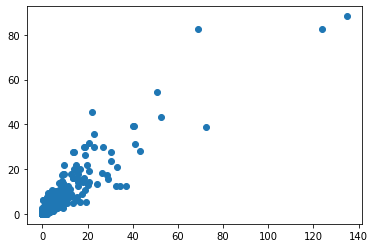

In [56]:
#### Checking the Train Test Accuracy Within Trained Dataset by splitting

#### splitting the Data of DF_Train Datast
X_train,X_test,Y_train,Y_test=split(x_train,y_train,test_size=0.30,random_state=100)

DCTr=DecisionTreeRegressor()

DCTr.fit(X_train,Y_train)

#### Predicting the model

train_pred=DCTr.predict(X_train)

DecisionTreetest_pred2=DCTr.predict(X_test)


#### Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(Y_train,train_pred)))
print('R2_score of trained data is:',r2_score(Y_train,train_pred))

print('RMse of test data is:',np.sqrt(mean_squared_error(Y_test,DecisionTreetest_pred2)))
print('R2_score of test data is:',r2_score(Y_test,DecisionTreetest_pred2))

plt.scatter(Y_test,DecisionTreetest_pred2)

Dropping  ID
RMse of trained data is: 1.2888771453558954e-18
R2_score of trained data is: 1.0
RMse of test data is: 0.373626290210743
R2_score of test data is: 0.8501356278194891

#### Model Building Full Train Dataset for final test Prediction

In [43]:
#Model Building For Final TRain Test data given in problem
DCTr=DecisionTreeRegressor()

DCTr.fit(x_train,y_train)

# Predicting the model

train_pred=DCTr.predict(x_train)
DecisionTreetest_pred=DCTr.predict(x_test)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train,train_pred)))
print('R2_score of trained data is:',r2_score(y_train,train_pred))

RMse of trained data is: 1.248214704911199e-18
R2_score of trained data is: 1.0


### Random Forest Model

#### Model Building with Train test splitting in Train Dataset

In [ ]:
#### Checking the Train Test Accuracy Within Trained Dataset by splitting

#### splitting the Data of DF_Train Datast
X_train,X_test,Y_train,Y_test=split(x_train,y_train,test_size=0.30,random_state=100)

rfr=RandomForestRegressor(random_state=42,oob_score=True)

rfr.fit(X_train,Y_train)

# Predicting the model

train_pred=rfr.predict(X_train)
test_pred=rfr.predict(X_test)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(Y_train,train_pred)))
print('R2_score of trained data is:',r2_score(Y_train,train_pred))
      
print('RMse of test data is:',np.sqrt(mean_squared_error(Y_test,test_pred)))
print('R2_score of test data is:',r2_score(Y_test,test_pred))      

#### Model Building Full Train Dataset for final test Prediction

In [ ]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42,oob_score=True)

rfr.fit(x_train,y_train_)

# Predicting the model

train_pred=rfr.predict(x_train)
test_pred=rfr.predict(x_test)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train_pred

### Gradient Boosting Model

#### Model Building with Train test splitting in Train Dataset

In [ ]:
#### Checking the Train Test Accuracy Within Trained Dataset by splitting

#### splitting the Data of DF_Train Datast
X_train,X_test,Y_train,Y_test=split(x_train,y_train,test_size=0.30,random_state=100)
gbr=GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,Y_train)

# Predicting the model

train_pred=gbr.predict(X_train)
test_pred=gbr.predict(X_test)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(Y_train,train_pred)))
print('R2_score of trained data is:',r2_score(Y_train,train_pred))

print('RMse of test data is:',np.sqrt(mean_squared_error(Y_test,test_pred)))
print('R2_score of test data is:',r2_score(Y_test,test_pred)) 

plt.scatter(Y_test,test_pred)

#### Model Building Full Train Dataset for final test Prediction

In [ ]:
gbr=GradientBoostingRegressor(random_state=42)

gbr.fit(x_train,y_train)

# Predicting the model

train_pred=rfr.predict(x_train)
test_pred=rfr.predict(x_test)


# Regression results
print('RMse of trained data is:',np.sqrt(mean_squared_error(y_train_log,train_pred)))
print('R2_score of trained data is:',r2_score(y_train_log,train))